XGBoost with Hyperparameters Accuracy: 0.7058965303076652
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     59879
           1       0.68      0.64      0.66     47998

    accuracy                           0.71    107877
   macro avg       0.70      0.70      0.70    107877
weighted avg       0.70      0.71      0.70    107877

XGBoost without Hyperparameters Accuracy: 0.6888493376716075
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     59879
           1       0.66      0.63      0.64     47998

    accuracy                           0.69    107877
   macro avg       0.68      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877



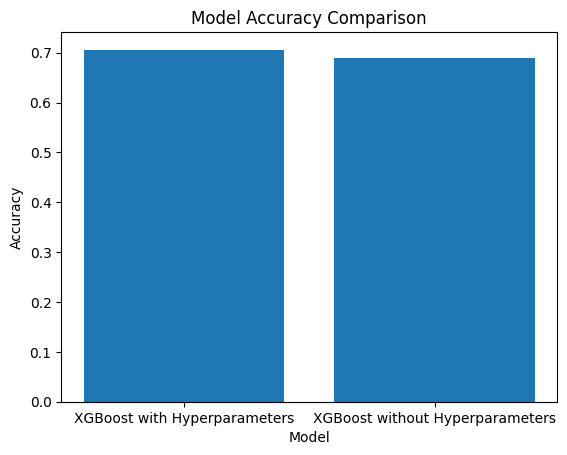

CPU times: total: 1min 23s
Wall time: 28.8 s


In [2]:
%%time
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load and read the dataset
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Data Preprocessing Step

# Handle missing values, remove if necessary
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into X (features) and y (target)
X = data.drop('Delay', axis=1)
y = data['Delay']

# Split the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Evaluation and Training for XGBoost with hyperparameters
model_xgb1 = XGBClassifier(learning_rate=0.19, n_estimators=97, max_depth=11, subsample=0.90, colsample_bytree=0.83)  # XGBoost hyperparameter model parameters
model_xgb1.fit(X_train, y_train)  # XGBoost model training

# XGBoost Model Evaluation
y_pred_xgb1 = model_xgb1.predict(X_test)
accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb1)
report_xgb1 = classification_report(y_test, y_pred_xgb1)

print(f'XGBoost with Hyperparameters Accuracy: {accuracy_xgb1}')
print(report_xgb1)

# Model Evaluation and Training for XGBoost without hyperparameters
model_xgb2 = XGBClassifier()  # Create XGBoost model without hyperparameters

model_xgb2.fit(X_train, y_train)  # Train XGBoost model

# XGBoost Model Evaluation
y_pred_xgb2 = model_xgb2.predict(X_test)
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb2)
report_xgb2 = classification_report(y_test, y_pred_xgb2)

print(f'XGBoost without Hyperparameters Accuracy: {accuracy_xgb2}')
print(report_xgb2)

# Define accuracy for both models
accuracy = [accuracy_xgb1, accuracy_xgb2]

# Define labels for both models
labels = ['XGBoost with Hyperparameters', 'XGBoost without Hyperparameters']

plt.bar(labels, accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
